In [28]:
!pip install mlxtend

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from mlxtend.regressor import StackingCVRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Visualisierungen & Aufbereitung

In [29]:
df=pd.read_csv('ames.csv')
#ab 1000 rund testdaten --> allles(33%)

In [30]:
df["Sale_Price"].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: Sale_Price, dtype: float64

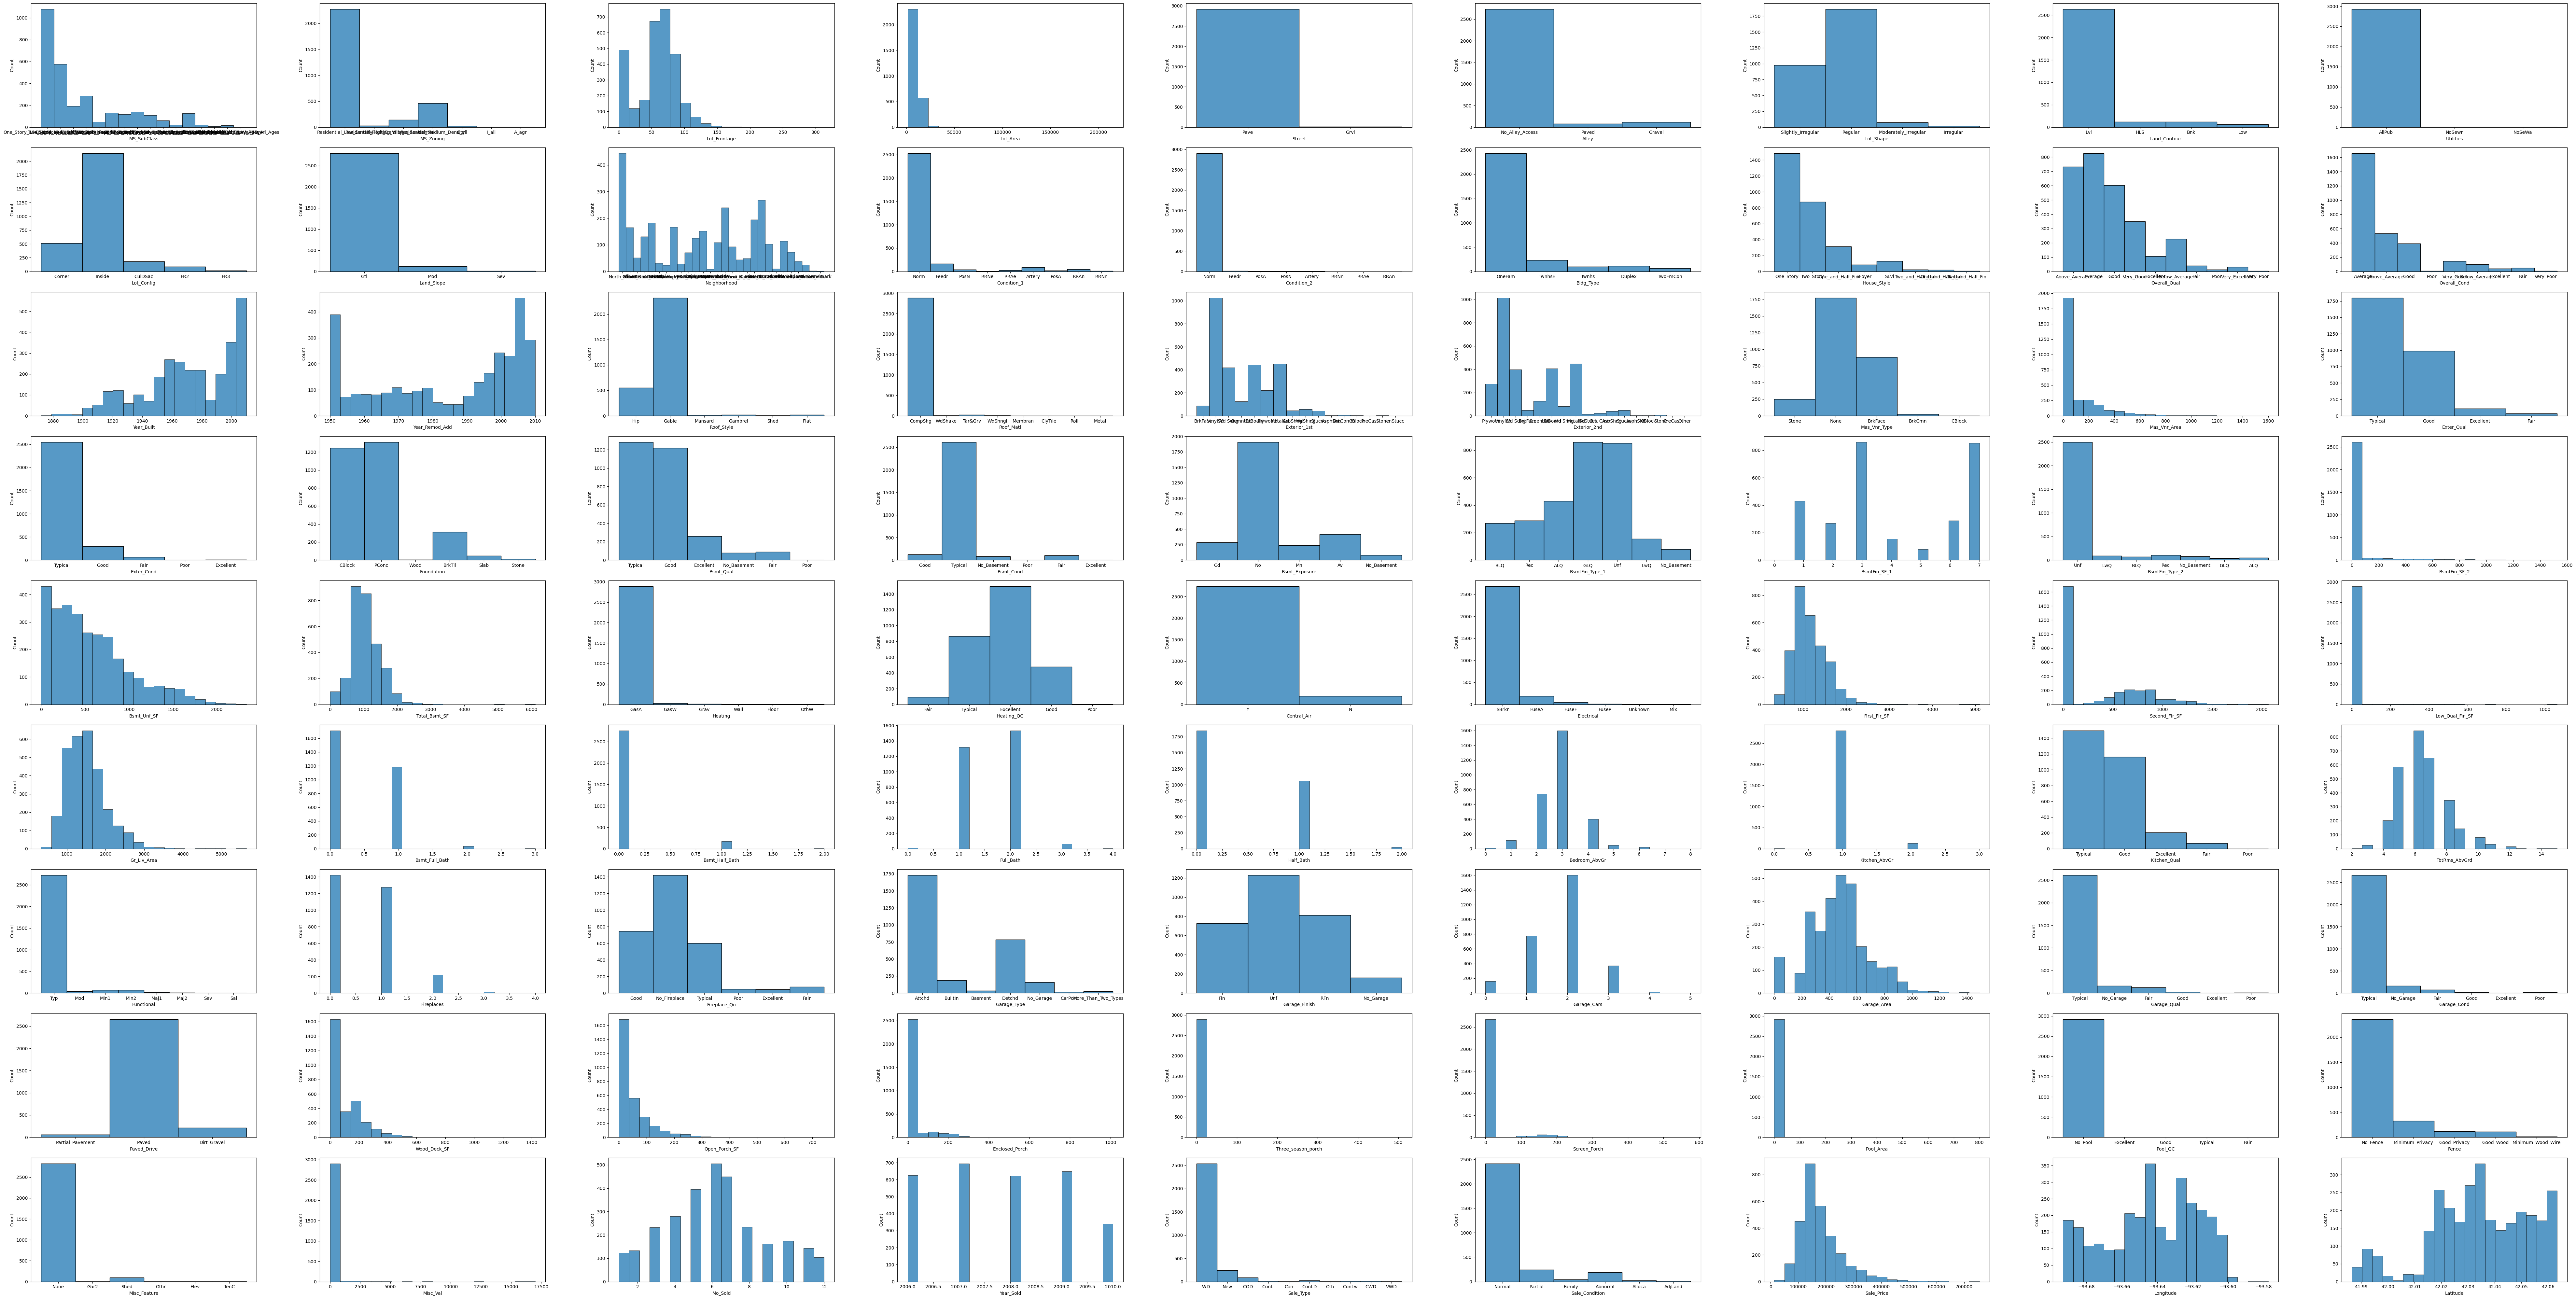

In [31]:
def histplot_all_12(data, width, height, nr_cols, nr_rows):
    figure, axes = plt.subplots(nr_rows, nr_cols) # setting the number of rows and columns of the plotted diagrams
    figure.set_size_inches(width, height) # setting the size of the diagrams
    cols = data.columns # extracting the column names 
    # with z set to 0, iterating over the columns of the dataframe to plot all 12 diagrams using seaborns histplot method !
    z = 0
    for i in range(nr_rows):
        for j in range(nr_cols):

            sns.histplot(bins=20, data=data[cols[z]], ax=axes[i, j])
            z = z+1

    plt.tight_layout(pad=1.08, h_pad=1, w_pad=1, rect=(0,0,4,4))

histplot_all_12(df, 20, 10, 9, 9)




In [32]:
import matplotlib.pyplot as plt
import numpy as np
def streudiagramm(x_achse, y_achse):
    # Grundlegendes Streudiagramm erstellen
    plt.plot(x_achse, y_achse, 'o')

    # Erhalten Sie m (Steigung) und b (Achsenabschnitt) der linearen Regressionslinie
    m, b = np.polyfit(x_achse, y_achse, 1)

    # Lineare Regressionslinie zum Streudiagramm hinzufügen 
    plt.plot(x_achse, m*x_achse+b)
    sns.regplot(x_achse, y_achse, ci=None)

sale_price = df["Sale_Price"]


<function matplotlib.pyplot.show(close=None, block=None)>

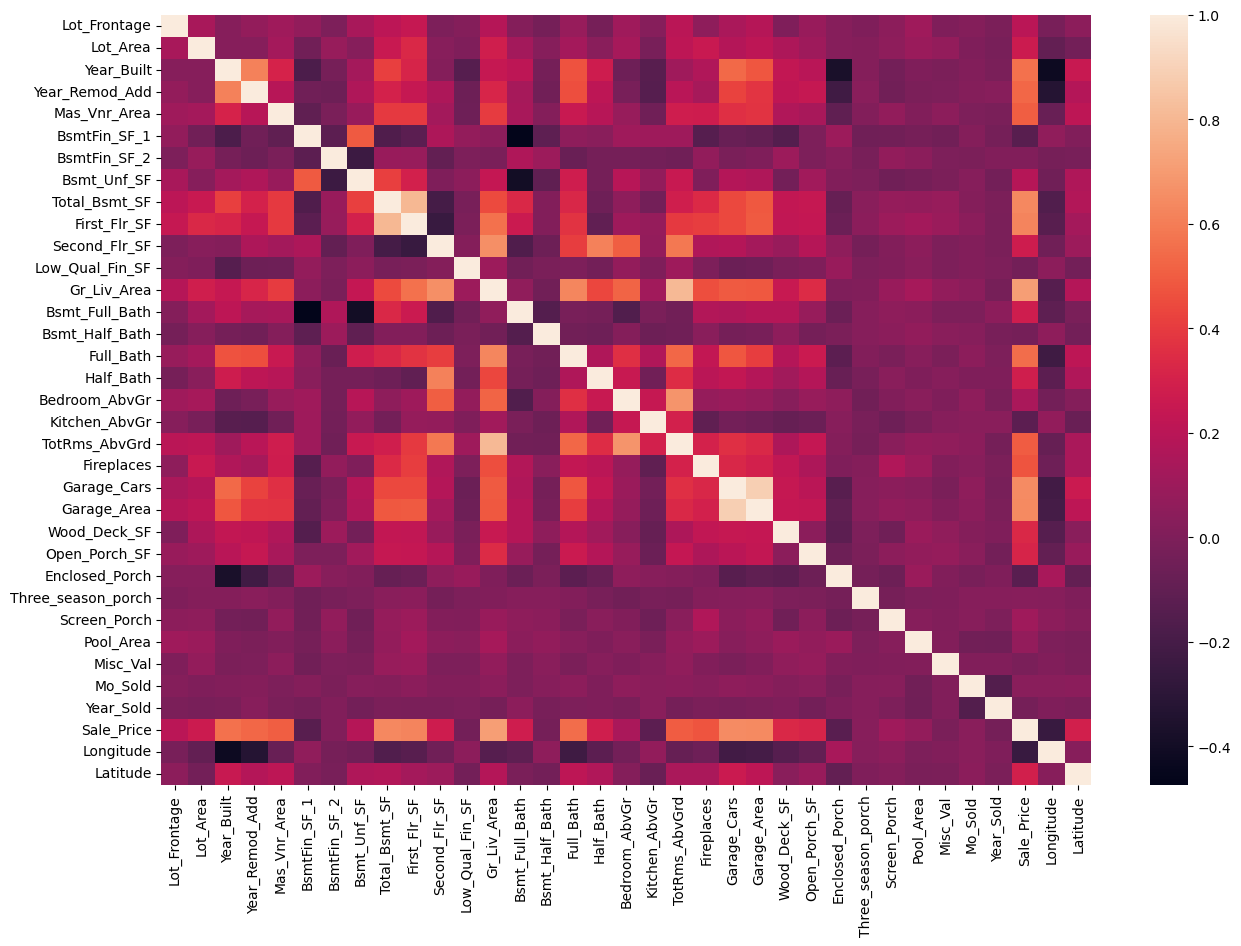

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())
plt.show

Aus der Grafik ist erkennbar, dass folgende Features untereinander stark korrelieren:
- Total_Bsmt_SF und First_Flr_SF
- Garage_Cars und Garage_Area (je mehr Platz in der Garage desto mehr Autos passen auch rein)
- Gr_Live_Area und TotRms_AbvGrd (je mehr Platz, desto mehr Räume)

Deswegen nehmen wir für das Trainieren nur eine der jeweiligen Variablen. Die mit der höheren Korrelation mit Sale-Price.

In [34]:
df_top = df.drop(["Garage_Area", "First_Flr_SF", "TotRms_AbvGrd"], axis=1)
df_zwischen = pd.DataFrame(df_top.corr()["Sale_Price"].sort_values(ascending=False)).reset_index()
df_zwischen

,index,Sale_Price
0,Sale_Price,1.000000
1,Gr_Liv_Area,0.706780
2,Garage_Cars,0.647562
3,Total_Bsmt_SF,0.632529
4,Year_Built,0.558426
5,Full_Bath,0.545604
6,Year_Remod_Add,0.532974
7,Mas_Vnr_Area,0.502196
8,Fireplaces,0.474558
9,Wood_Deck_SF,0.327143


In [41]:
df_zwischen[df_zwischen["Sale_Price"] > 0.5]["index"].to_list()

['Sale_Price',
 'Gr_Liv_Area',
 'Garage_Cars',
 'Total_Bsmt_SF',
 'Year_Built',
 'Full_Bath',
 'Year_Remod_Add',
 'Mas_Vnr_Area']

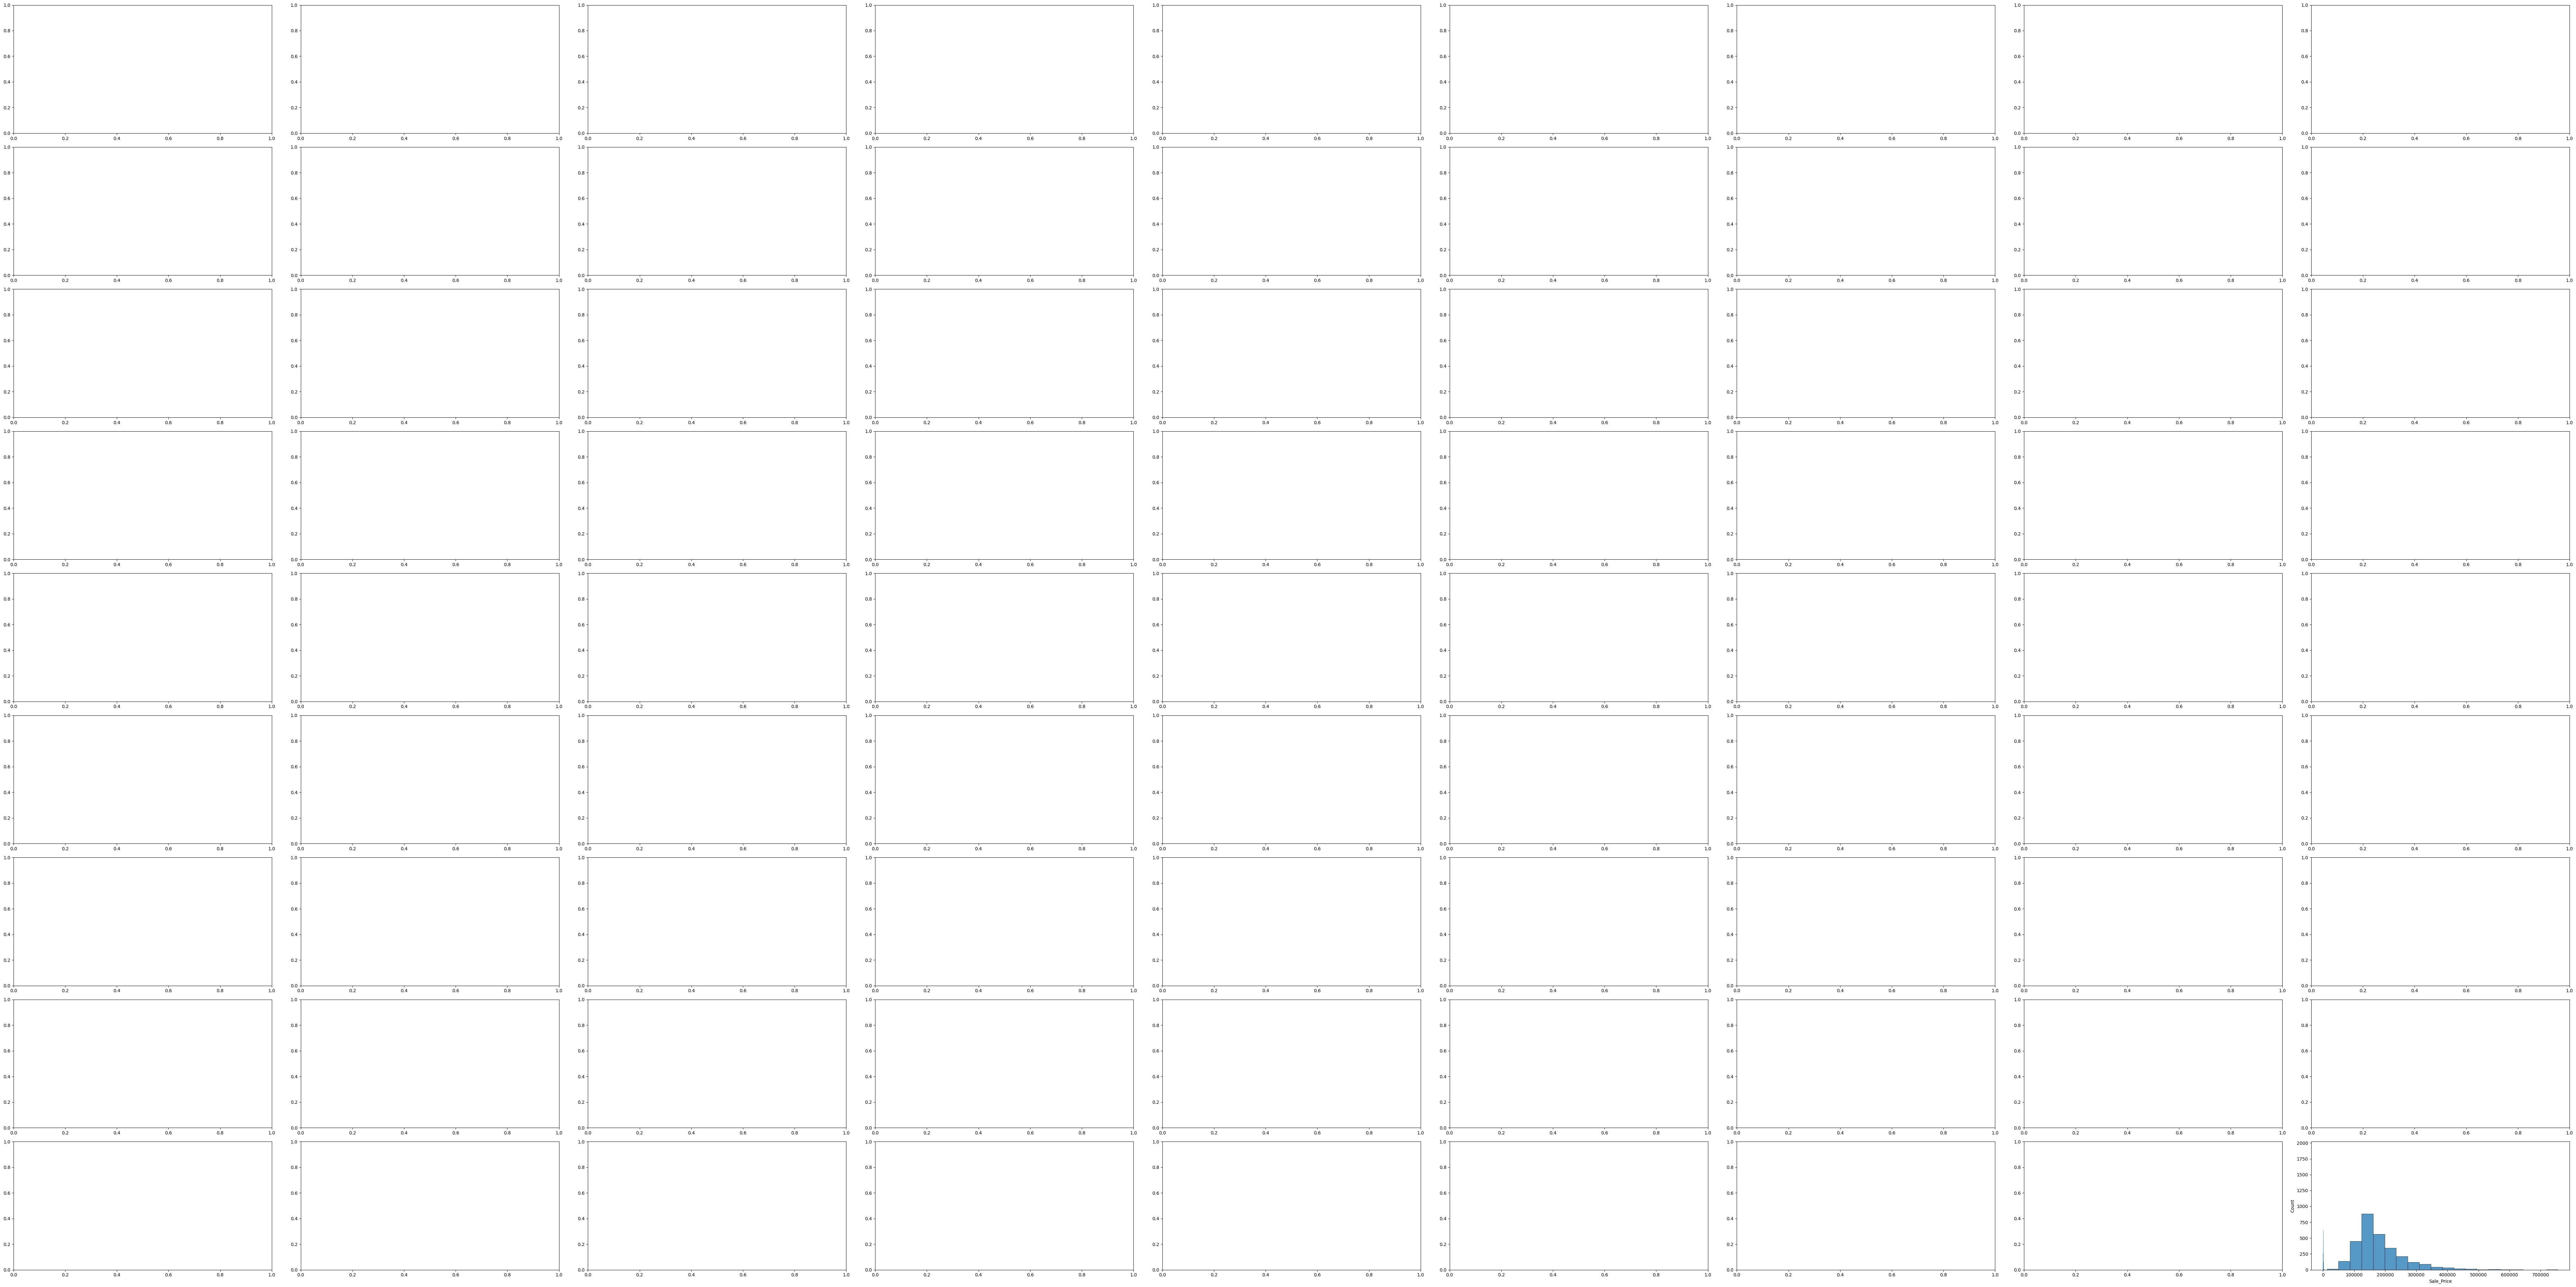

In [38]:
def histplot_all_12(data, width, height, nr_cols, nr_rows):
    figure, axes = plt.subplots(nr_rows, nr_cols) # setting the number of rows and columns of the plotted diagrams
    figure.set_size_inches(width, height) # setting the size of the diagrams
    cols = df_zwischen[df_zwischen["Sale_Price"] > 0.5]["index"].to_list() # extracting the column names 
    # with z set to 0, iterating over the columns of the dataframe to plot all 12 diagrams using seaborns histplot method !
    z = 0
    for i in cols:
        z=1
        sns.histplot(bins=20, data=data[i])

    plt.tight_layout(pad=1.08, h_pad=1, w_pad=1, rect=(0,0,4,4))

histplot_all_12(df, 20, 10, 9, 9)


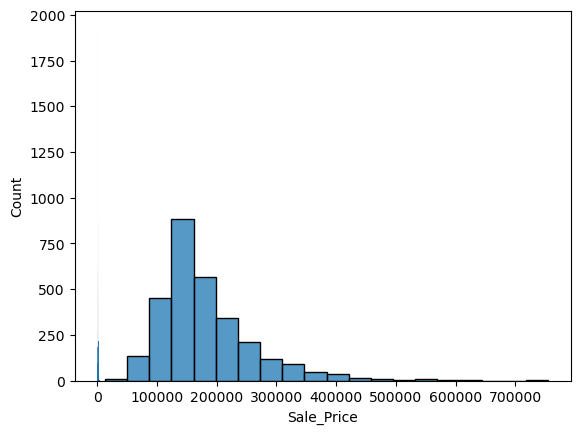

In [45]:
figure, axes = plt.subplots() # setting the number of rows and columns of the plotted diagrams

cols = df_zwischen[df_zwischen["Sale_Price"] > 0.5]["index"].to_list() # extracting the column names 
# with z set to 0, iterating over the columns of the dataframe to plot all 12 diagrams using seaborns histplot method !
z = 0
for i in cols:
    sns.histplot(bins=20, data=df[i])

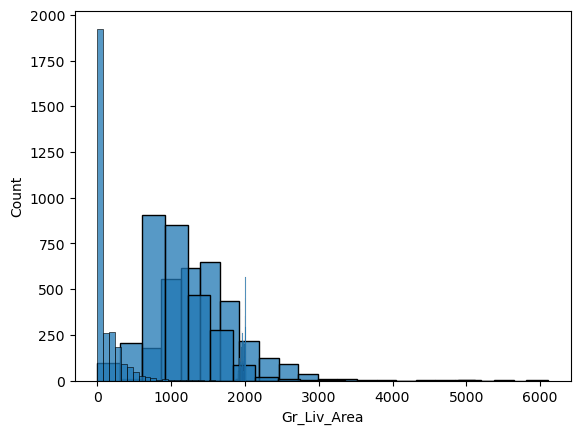

In [46]:
for y_achse in df_zwischen[df_zwischen["Sale_Price"] > 0.5]["index"].to_list():
    if y_achse == 'Sale_Price':
        continue
    else : 
        streudiagramm(sale_price, y_achse)


In [8]:
df_top = df_top[df_zwischen[df_zwischen["Sale_Price"] > 0.5]["index"].to_list()]

In [9]:
df_top

,Sale_Price,Gr_Liv_Area,Garage_Cars,Total_Bsmt_SF,Year_Built,Full_Bath,Year_Remod_Add,Mas_Vnr_Area
0,215000,1656,2,1080,1960,1,1960,112
1,105000,896,1,882,1961,1,1961,0
2,172000,1329,1,1329,1958,1,1958,108
3,244000,2110,2,2110,1968,2,1968,0
4,189900,1629,2,928,1997,2,1998,0
...,...,...,...,...,...,...,...,...
2925,142500,1003,2,1003,1984,1,1984,0
2926,131000,902,2,864,1983,1,1983,0
2927,132000,970,0,912,1992,1,1992,0
2928,170000,1389,2,1389,1974,1,1975,0


In [10]:
df.dtypes.value_counts()

object     46
int64      33
float64     2
dtype: int64

In [11]:
df_top.dtypes.value_counts()

int64    8
dtype: int64

In [12]:
df.select_dtypes(include="float64")

,Longitude,Latitude
0,-93.619754,42.054035
1,-93.619756,42.053014
2,-93.619387,42.052659
3,-93.617320,42.051245
4,-93.638933,42.060899
...,...,...
2925,-93.604776,41.988964
2926,-93.602680,41.988314
2927,-93.606847,41.986510
2928,-93.600190,41.990921


In [13]:
X_all = df.drop(columns = ['Sale_Price'],axis=1)
y_all = df['Sale_Price']
X_all.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0,5,2010,WD,Normal,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,6,2010,WD,Normal,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0,4,2010,WD,Normal,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,3,2010,WD,Normal,-93.638933,42.060899


In [14]:
X_top = df_top.drop(columns = ['Sale_Price'],axis=1)
y_top = df_top['Sale_Price']
X_top.head()

,Gr_Liv_Area,Garage_Cars,Total_Bsmt_SF,Year_Built,Full_Bath,Year_Remod_Add,Mas_Vnr_Area
0,1656,2,1080,1960,1,1960,112
1,896,1,882,1961,1,1961,0
2,1329,1,1329,1958,1,1958,108
3,2110,2,2110,1968,2,1968,0
4,1629,2,928,1997,2,1998,0


In [15]:
def encode(X, has_objects=True):
    scaler = MinMaxScaler()
    if has_objects:
        # Transform string values to numbers
        object_df = X.select_dtypes(include="object")
        object_df = object_df.apply(LabelEncoder().fit_transform)

        # Select numeric values of data
        numerics = X.select_dtypes(include=["int64", "float64"])

        # Merge numerics and objects
        data = numerics.merge(object_df, left_index=True, right_index=True)
        return pd.DataFrame(scaler.fit_transform(data), columns=data.columns.to_list())
    return pd.DataFrame(scaler.fit_transform(X), columns=X.columns.to_list())

In [16]:
df_all = encode(X_all)
df_top = encode(X_top, has_objects=False)

In [17]:
df_all.dtypes.value_counts()

float64    80
dtype: int64

## Durchführung der Pipline einer Regression inklusive Kreuzvalidierung 

In [18]:
random_seed=42
test_size=0.3

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(df_all[:2001], y_all[:2001], random_state=random_seed, test_size=test_size)
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(df_top[:2001], y_top[:2001], random_state=random_seed, test_size=test_size)

In [19]:
def validation(models, labels, X, y, cv=5):
    print('5-fold cross validation scores:\n')
    data=[]
    for clf, label in zip(models, labels):
        scores = cross_val_score(clf, X, y, cv=cv)
        data.append([scores.mean(),scores.std(),label])
    return pd.DataFrame(data,columns=['mean_score','std','label'])

In [20]:
# Initialize Models
svr = SVR(kernel='linear')
lasso = Lasso()
rf = RandomForestRegressor(n_estimators=5, random_state=random_seed)
stack = StackingCVRegressor(regressors=(svr, lasso, rf), meta_regressor=lasso, random_state=random_seed)

models = [svr, lasso, rf, stack]
labels = ['SVM', 'Lasso', 'Random Forest', 'StackingCVRegressor']

# Run cross-validation
overview_all = validation(models, labels, X_train_all, y_train_all, cv=5)
overview_top = validation(models, labels, X_train_top, y_train_top, cv=5)

5-fold cross validation scores:



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.013e+09, tolerance: 5.169e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to in

5-fold cross validation scores:



/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/pytho

In [21]:
overview_all

,mean_score,std,label
0,-0.050191,0.021314,SVM
1,0.592116,0.399676,Lasso
2,0.844753,0.046217,Random Forest
3,0.778857,0.123152,StackingCVRegressor


In [22]:
overview_top

,mean_score,std,label
0,-0.059601,0.021799,SVM
1,0.738431,0.134725,Lasso
2,0.792183,0.045150,Random Forest
3,0.791277,0.078536,StackingCVRegressor


In [25]:
rf.fit(X_train_all,y_train_all)
rf.score(X_test_all,y_test_all)

0.8319165596335141

Der Random Forest konnte eine Präzision von rund 0,83 erreicht werden.

In [27]:
stack.fit(X_train_all,y_train_all)
stack.score(X_test_all,y_test_all)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.737e+10, tolerance: 6.944e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0.838086563018512

Mit dem StackingCVRegressor konnte hingegen auf den Testdaten eine PRäzision von 0,84 beobachtet werden